# For this project, we will use the infrared_thermography_temperature dataset from the UCI repository for a regression task.

# INSTALLING AND IMPORTING  MODULES

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install ucimlrepo

In [ ]:
import random

In [ ]:
import copy, math
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# IMPORTING DATASET

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
Y = infrared_thermography_temperature.data.targets
data = pd.merge(X, Y, left_index=True, right_index=True)
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


# CHANGING CATEGORICAL VALUES INTO NUMERICAL VALUES

The value 'Male' is converted to 1 and the value 'Female' is converted to 0

In [ ]:
data['Gender'] = data['Gender'].replace(['Male','Female'],[1,0])
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,1,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,0,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,0,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,0,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,1,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,0,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,0,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,1,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity'])
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,1,45.5,5,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,0,35.5,2,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,0,25.5,5,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,0,25.5,2,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,1,19.0,5,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,23.0,1,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,0,23.0,5,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,0,19.0,2,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,1,28.0,3,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


# CONVERSION OF INTERVAL INTO AVERAGE FOR AGE COLUMN

Age is given as an interval and hence the average value is computed and stored

In [ ]:
def interval_to_average(interval):
    if interval.startswith('>'):
        lower = int(interval[1:])
        return lower + 5  # Assuming the next 10-year range midpoint
    else:
        lower, upper = map(int, interval.split('-'))
        return (lower + upper) / 2

# Apply the function to the Age column
data['Age'] = data['Age'].apply(interval_to_average)
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,1,45.5,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,0,35.5,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,0,25.5,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,0,25.5,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,1,19.0,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,23.0,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,0,23.0,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,0,19.0,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,1,28.0,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


#CHECKING AND FILLING NULL VALUES

In [ ]:
# Calculate the column-wise means
column_means = data.mean()

# Fill NaN values with the column means
data= data.fillna(column_means)

#REMOVING OUTLIERS

In [ ]:
def is_outlier(value, column):
    mean = data[column].mean()
    std = data[column].std()
    return abs(value - mean) > 3 * std
# remove outliers from each column
for column in data.columns:
    outliers = data[is_outlier(data[column], column)]
    data = data.drop(outliers.index)
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
1,0,35.5,2,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,0,25.5,5,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,0,25.5,2,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,1,19.0,5,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
5,0,25.5,5,24.0,26.0,0.8,0.8275,35.1325,35.2025,34.5275,...,34.4800,34.2850,34.2425,34.8600,34.6925,35.8500,35.8175,35.8500,36.90,36.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,23.0,1,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,0,23.0,5,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,0,19.0,2,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,1,28.0,3,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


# DATA EXPLORATION

In [ ]:
data.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,36.979216,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.386403,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.750000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.800000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.900000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.100000,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.600000,40.340000


# CHECKING CORRELATION

Correlation between two variables measures the strength and direction of their relationship. It is quantified by the correlation coefficient, which ranges from -1 to 1. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates that as one variable increases, the other tends to decrease. A correlation close to zero suggests little to no linear relationship between the variables.

In [ ]:
data.corr()['aveOralF']

Gender        -0.089537
Age           -0.031643
Ethnicity      0.081893
T_atm          0.000004
Humidity       0.067907
Distance      -0.079608
T_offset1      0.035955
Max1R13_1      0.305905
Max1L13_1      0.289606
aveAllR13_1    0.247174
aveAllL13_1    0.230779
T_RC1          0.339357
T_RC_Dry1      0.308158
T_RC_Wet1      0.331568
T_RC_Max1      0.340111
T_LC1          0.293447
T_LC_Dry1      0.288568
T_LC_Wet1      0.283060
T_LC_Max1      0.294794
RCC1           0.290381
LCC1           0.256823
canthiMax1     0.338136
canthi4Max1    0.336556
T_FHCC1        0.143250
T_FHRC1        0.157390
T_FHLC1        0.164481
T_FHBC1        0.171828
T_FHTC1        0.153571
T_FH_Max1      0.207083
T_FHC_Max1     0.201052
T_Max1         0.482564
T_OR1          0.525930
T_OR_Max1      0.525650
aveOralF       1.000000
aveOralM       0.735737
Name: aveOralF, dtype: float64

In [ ]:
data.corr()['aveOralM']

Gender        -0.171067
Age           -0.011086
Ethnicity      0.088654
T_atm          0.062726
Humidity       0.098585
Distance      -0.063231
T_offset1      0.101008
Max1R13_1      0.443880
Max1L13_1      0.455719
aveAllR13_1    0.352674
aveAllL13_1    0.369068
T_RC1          0.479576
T_RC_Dry1      0.448203
T_RC_Wet1      0.479195
T_RC_Max1      0.480677
T_LC1          0.466287
T_LC_Dry1      0.457078
T_LC_Wet1      0.440086
T_LC_Max1      0.467372
RCC1           0.424774
LCC1           0.417647
canthiMax1     0.502259
canthi4Max1    0.500989
T_FHCC1        0.271146
T_FHRC1        0.288065
T_FHLC1        0.258653
T_FHBC1        0.295309
T_FHTC1        0.275348
T_FH_Max1      0.352864
T_FHC_Max1     0.346766
T_Max1         0.633309
T_OR1          0.583236
T_OR_Max1      0.583237
aveOralF       0.735737
aveOralM       1.000000
Name: aveOralM, dtype: float64

# REMOVING UNWANTED COLUMNS

Since the columns Gender, Age, Ethnicity, T_atm, Humidity and Distance have a correlation closer to 0, they are not closely associated with the target variables and hence can be removed from the dataset.

In [ ]:
columns_to_drop = ['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance']

# Filter the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the columns that exist
data.drop(columns=existing_columns_to_drop, inplace=True)
data

,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
1,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
5,0.8275,35.1325,35.2025,34.5275,34.5825,35.1300,35.1225,35.0500,35.1475,35.2150,...,34.4800,34.2850,34.2425,34.8600,34.6925,35.8500,35.8175,35.8500,36.90,36.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,35.7375,35.7750,35.8025,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,35.8625,36.0075,35.8250,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,36.3650,36.4475,36.3025,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,35.7550,35.8150,35.7950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


# Develop Python code to build the model
## We will split the data into training and testing sets and then build a linear regression model using gradient descent.

# **aveOralF**

# SPLITTING THE DATA

We first separate the features and targets by removing the 'aveOralF' and 'aveOralM' columns from the dataset data, leaving the remaining columns as features in X. The 'aveOralF' column is then selected as the target variable y. Next, the data is split into training and test sets using the train_test_split function, with 70% of the data allocated for training and 30% for testing. The split is made reproducible by setting the random_state parameter to 42.

In [ ]:
# Split the data into features and targets
X = data.drop(columns=['aveOralF', 'aveOralM'])
y = data[['aveOralF']]

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# INITIALIZING W AND B AS 0

In [ ]:
b_init = 0
print(b_init)
w_init = np.array([0]*27)
print(w_init)

0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# COMPUTE COST WITH MULTIPLE VARIBALES

The compute_cost function calculates the Mean Squared Error (MSE) of a linear regression model. It takes the feature matrix X, target values y, weights w, and bias b, and computes the average squared difference between the predicted and actual target values, scaled by the number of examples. This cost helps in assessing the model's prediction accuracy.

In [ ]:
def compute_cost(X, y, w, b):
  m = X.shape[0]
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X[i], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost / (2 * m)
  return cost

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [681.55805532]


# GRADIENT DESCENT

This code computes the gradient of the cost function for linear regression with respect to the parameters \( w \) (weights) and \( b \) (bias). The function takes in the input data matrix \( X \), the output vector \( y \), and the current values of \( w \) and \( b \). It initializes gradients \( dj\_dw \) and \( dj\_db \) to zero. Then, for each training example, it calculates the prediction error and updates the gradients by summing the product of the error with the corresponding feature values for \( dj\_dw \) and the error itself for \( dj\_db \). Finally, it averages the gradients over all examples and returns them.

In [ ]:
def compute_gradient(X, y, w, b):
  m,n = X.shape           #(number of examples, number of features)
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
      err = (np.dot(X[i], w) + b) - y[i]
      for j in range(n):
          dj_dw[j] = dj_dw[j] + err * X[i, j]
      dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_db, dj_dw

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-36.91981132]
dj_dw at initial w,b: 
 [  -35.63396348 -1311.99167145 -1312.38039071 -1286.87945469
 -1291.1666748  -1314.19183555 -1311.69092066 -1309.77678102
 -1315.28330674 -1313.47186463 -1312.39911822 -1307.16273214
 -1314.58826812 -1299.1276027  -1297.41071033 -1318.6693652
 -1317.59903586 -1276.3007262  -1276.20774343 -1276.54429496
 -1272.78916232 -1277.02411365 -1306.30765338 -1294.8038893
 -1329.4916408  -1320.04158191 -1321.26211258]


<ipython-input-40-52dfff27d181>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


This code implements the gradient descent algorithm, which is an optimization technique used to minimize a given cost function. The function gradient_descent takes several parameters: X (input features), y (target values), w_in (initial weights), b_in (initial bias), cost_function (function to calculate the cost), gradient_function (function to calculate gradients), alpha (learning rate), and num_iters (number of iterations).

The algorithm begins by initializing J_history to store the cost at each iteration and deep copies the initial weights w_in to avoid modifying the original weights. The initial bias is set to b_in. In each iteration of the loop, the gradients of the cost function with respect to weights and bias (dj_dw and dj_db) are calculated using the gradient_function. The weights and bias are then updated by subtracting the product of the learning rate alpha and the corresponding gradients. The cost is computed using the cost_function and stored in J_history for later analysis. This process repeats for the specified number of iterations. Finally, the function returns the optimized weights, bias, and the history of the cost function values.

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))


    return w, b, J_history #return final w,b and J history for graphing

# VALUE OF W's AND B

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print("b,w found by gradient descent: b=",b_final,"w=",w_final)

<ipython-input-40-52dfff27d181>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


b,w found by gradient descent: b= [0.00114046] w= [0.00108698 0.04048442 0.04049661 0.03970135 0.03983471 0.04055513
 0.04047556 0.0404185  0.04058902 0.04053146 0.04049747 0.04033515
 0.04056614 0.04008448 0.04003163 0.04069391 0.04066077 0.03937398
 0.03937477 0.03938213 0.03926569 0.0394022  0.04031946 0.03995364
 0.04104219 0.04075535 0.04079322]


# PREDICTIONS FOR TEST DATA

In [ ]:
m,_ = X_test.shape
y_pred=[]
for i in range(m):
  y_pred.append(np.dot(X_test[i], w_final) + b_final)
  print("prediction:",y_pred[i],"target value: ",y_test[i])

prediction: [36.95003976] target value:  [36.85]
prediction: [36.90258559] target value:  [36.5]
prediction: [36.30531884] target value:  [36.45]
prediction: [36.88875084] target value:  [36.5]
prediction: [37.09952871] target value:  [36.85]
prediction: [37.37133548] target value:  [37.]
prediction: [37.7297147] target value:  [37.15]
prediction: [37.37212498] target value:  [37.2]
prediction: [37.08967547] target value:  [37.]
prediction: [36.35534059] target value:  [36.85]
prediction: [37.28803034] target value:  [37.05]
prediction: [36.82558845] target value:  [37.05]
prediction: [37.09367914] target value:  [36.8]
prediction: [37.17475499] target value:  [37.05]
prediction: [37.04470597] target value:  [37.1]
prediction: [36.93908176] target value:  [36.9]
prediction: [37.1315055] target value:  [36.9]
prediction: [37.00883913] target value:  [37.]
prediction: [36.59845997] target value:  [36.55]
prediction: [36.79137133] target value:  [37.15]
prediction: [36.7630148] target val

# Evaluate the built model using appropriate evaluation metrics

# EVALUATION METRICS

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.12447872039238705
R-squared (R²) Score: -1.6767620827748217
Mean Absolute Error (MAE): 0.278276432486226
Root Mean Squared Error (RMSE): 0.3528154197202654


# PLOTTING THE RESULTS

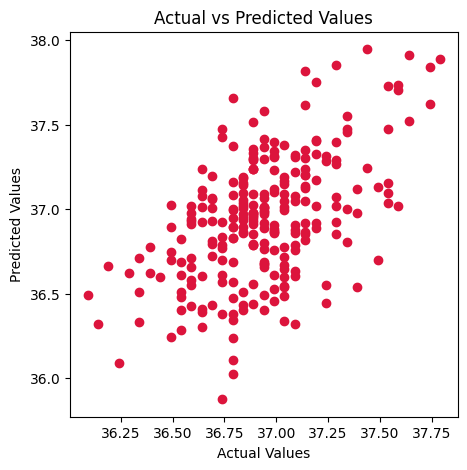

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# **aveOralM**

# SPLITTING THE DATA

In [ ]:
# Split the data into features and targets
X = data.drop(columns=['aveOralF', 'aveOralM'])
y = data[['aveOralM']]

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# INITIALIZING W AND B AS 0

In [ ]:
b_init = 0
print(b_init)
w_init = np.array([0]*27)
print(w_init)


0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# COMPUTE COST WITH MULTIPLE VARIBALES

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')


Cost at optimal w : [682.47985017]


# GRADIENT DESCENT

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-36.94437393]
dj_dw at initial w,b: 
 [  -35.66157501 -1312.88524558 -1313.27721767 -1287.7564622
 -1292.0494477  -1315.08711807 -1312.58422426 -1310.67118792
 -1316.17931587 -1314.36943225 -1313.29607977 -1308.05550801
 -1315.48660495 -1300.01407892 -1298.29799186 -1319.56926481
 -1318.49821761 -1277.17019742 -1277.07802133 -1277.41184575
 -1273.65680974 -1277.8927311  -1307.19365575 -1295.68493597
 -1330.39782318 -1320.94047033 -1322.16183668]


<ipython-input-40-52dfff27d181>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


# VALUE OF W's AND B

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print("b,w found by gradient descent: b=",b_final,"w=",w_final)


<ipython-input-40-52dfff27d181>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


b,w found by gradient descent: b= [0.00114094] w= [0.00108938 0.04051154 0.04052523 0.03972821 0.03986308 0.0405824
 0.04050264 0.04044675 0.0406163  0.0405601  0.04052616 0.04036342
 0.0405948  0.04011216 0.04006026 0.04072206 0.0406889  0.03940046
 0.03940168 0.03940757 0.03929238 0.03942803 0.04034461 0.03997999
 0.04107003 0.04078257 0.04082046]


# PREDICTIONS

In [ ]:
m,_ = X_test.shape
y_pred=[]
for i in range(m):
  y_pred.append(np.dot(X_test[i], w_final) + b_final)
  print("prediction:",y_pred[i],"target value: ",y_test[i])

prediction: [36.97523654] target value:  [36.89]
prediction: [36.92774574] target value:  [36.59]
prediction: [36.33007013] target value:  [36.34]
prediction: [36.91390219] target value:  [36.59]
prediction: [37.12482204] target value:  [37.14]
prediction: [37.39681726] target value:  [36.99]
prediction: [37.75543925] target value:  [37.19]
prediction: [37.39760742] target value:  [37.29]
prediction: [37.11496644] target value:  [36.64]
prediction: [36.38012771] target value:  [36.74]
prediction: [37.31345718] target value:  [37.24]
prediction: [36.85069456] target value:  [37.14]
prediction: [37.11896786] target value:  [37.39]
prediction: [37.20010522] target value:  [37.14]
prediction: [37.0699645] target value:  [37.29]
prediction: [36.96426821] target value:  [36.89]
prediction: [37.15682059] target value:  [36.84]
prediction: [37.03407398] target value:  [36.84]
prediction: [36.62341649] target value:  [36.39]
prediction: [36.81645534] target value:  [37.14]
prediction: [36.78807

# EVALUATION METRICS

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.10815117315942337
R-squared (R²) Score: -0.2299219046256944
Mean Absolute Error (MAE): 0.2649437331353491
Root Mean Squared Error (RMSE): 0.3288634567102635


# PREDICTING THE VALUES

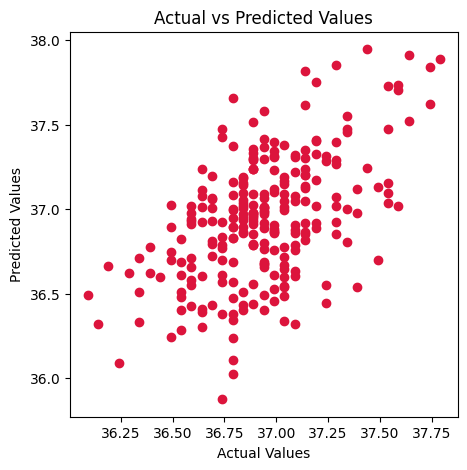

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()